<a href="https://colab.research.google.com/github/hanene2030/pandas/blob/main/16_merging_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging function

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df_usa = pd.read_csv("usa.csv", parse_dates=["date"], dayfirst=True)
df_aus = pd.read_csv("aus.csv", parse_dates=["date"], dayfirst=True)
df_bris = pd.read_csv("brisbane.csv", parse_dates=["date"], dayfirst=True)

display(df_usa.head(3), df_aus.head(3), df_bris.head(3))
# notice that we collect data within different frequencies

,date,temperature
0,2000-03-01,15.25
1,2000-09-01,15.77
2,2001-03-01,15.98


,date,temperature
0,2000-01-20,30.6
1,2001-01-20,32.7
2,2002-01-20,31.2


,date,temperature
0,2000-01-01,30.15
1,2000-01-08,30.31
2,2000-01-15,30.99


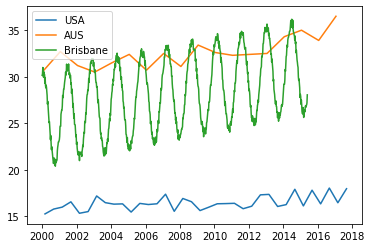

In [2]:
plt.plot(df_usa.date, df_usa.temperature, label="USA");
plt.plot(df_aus.date, df_aus.temperature, label="AUS");
plt.plot(df_bris.date, df_bris.temperature, label="Brisbane");

plt.legend();


In [3]:
# we  need some way of interpolating between them

## Ordered merging

In [4]:
merge1 = pd.merge(df_usa, df_aus, on="date", how="outer")
display(merge1.head(2), merge1.tail(2))

,date,temperature_x,temperature_y
0,2000-03-01,15.25,NaN
1,2000-09-01,15.77,NaN


,date,temperature_x,temperature_y
52,2016-01-20,NaN,33.9
53,2017-01-20,NaN,36.5


In [5]:
merge2 = pd.merge_ordered(df_usa, df_aus, on="date", suffixes=("_usa","_aus"))
merge2.head(4)

,date,temperature_usa,temperature_aus
0,2000-01-20,NaN,30.6
1,2000-03-01,15.25,NaN
2,2000-09-01,15.77,NaN
3,2001-01-20,NaN,32.7


In [6]:
merge3 = pd.merge_ordered(df_usa, df_aus, on="date", suffixes=("_usa","_aus"), fill_method="ffill")
merge3.head(4)

,date,temperature_usa,temperature_aus
0,2000-01-20,NaN,30.6
1,2000-03-01,15.25,30.6
2,2000-09-01,15.77,30.6
3,2001-01-20,15.77,32.7


## Merging with partial/closest matches 

In [9]:
df_both = pd.merge_ordered(df_usa,df_aus, on="date", suffixes=("_usa","_aus"), fill_method="ffill" )
df_all = pd.merge_asof(df_both, df_bris, on="date").rename(columns={'temperature':'temperature_bris'})

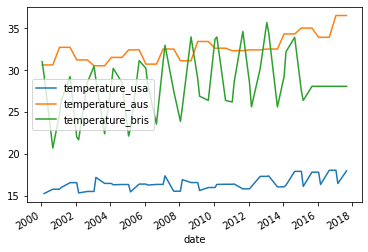

In [10]:
df_all.plot("date",["temperature_usa", "temperature_aus", "temperature_bris"]);

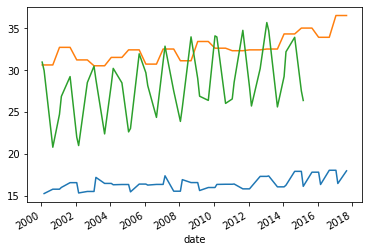

In [15]:
df_tmp = pd.merge_asof(df_both, df_bris, on="date", tolerance=pd.Timedelta('14 days'), direction="nearest")
df_tmp.plot("date",df_tmp.columns[1:] ,legend=False);

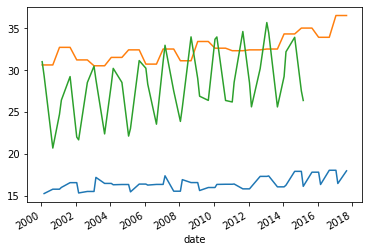

In [17]:
df_tmp = pd.merge_asof(df_both, df_bris, on="date", tolerance=pd.Timedelta('14 days'), direction="backward")
df_tmp.plot("date",df_tmp.columns[1:] ,legend=False);

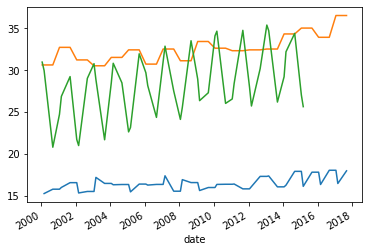

In [18]:
df_tmp = pd.merge_asof(df_both, df_bris, on="date", tolerance=pd.Timedelta('14 days'), direction="forward")
df_tmp.plot("date",df_tmp.columns[1:] ,legend=False);